In [1]:
# Imports
%reload_ext autoreload
%load_ext autoreload
%autoreload 2

%matplotlib inline

import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from tabulate import tabulate

sys.path.append('../lib')
import utils
import preprocessing

def log_plot(columns):
    plt.figure(figsize=(20,15))

    for column in columns:
        plt.plot(np.sort(np.log(df_raw[column])), label=column)

    plt.legend(loc='lower right')
    plt.show()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Load in data

PATH = "../data/"
df_raw = pd.read_csv(f'{PATH}churn.csv', low_memory=False, 
                     parse_dates=['canceldate', 'licence_registration_date', 'golive_date'])

COLUMN_NAME = 'days_active'

In [3]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000):
        display(df)

In [4]:
df_processed = preprocessing.prepare_data(df_raw.loc[df_raw.licence_status != "STAGING"])

Sorting dataframe by licence_registration_date ...
Converting annual_revenue to a number ...
Defaulting all NaN values with median ...
Defaulting annual_revenue for missing values to the plans mean or platform medeian ...
Binning last_login_days
Binning NPS data
Fixing days_active abnormal values ...


../lib/preprocessing.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature][i] = random_replace_value(df, feature)


One-hot encoding customer_account_status
One-hot encoding plan
One-hot encoding nps
Preprocessing dates ...
Dropping features ...
Replacing NaN values with median and adding '_was_nan' column ...
Convert categorical features into numbers ...
List any features that still have NaN values ...
Feature has NaN values: last_login_categories


In [8]:
def data_distribution(df, feature):
    feature_mean = df[feature].mean()
    feature_std = df[feature].std()

    for i in [1,2,3]:
        output = round(len(df[COLUMN_NAME].loc[(df[COLUMN_NAME] > (feature_mean - (feature_std * i))) &
                                            (df[COLUMN_NAME] < (feature_mean + (feature_std * i)))]) / len(df) * 100,2)
        print(output)
        
utils.general_stats(df_processed, COLUMN_NAME)

NameError: name 'utils' is not defined

In [9]:
df_processed[df_processed[COLUMN_NAME].isna() == True]

,username,days_active,team,vertical,salesperson,golive_days,cases_total,cases_open,cases_closed,cases_age_hours_total,...,licence_registration_Dayofweek_was_nan,licence_registration_Dayofyear_was_nan,licence_registration_Elapsed_was_nan,golive_Year_was_nan,golive_Month_was_nan,golive_Week_was_nan,golive_Day_was_nan,golive_Dayofweek_was_nan,golive_Dayofyear_was_nan,golive_Elapsed_was_nan


In [10]:
df_processed[COLUMN_NAME].describe()

count    5547.000000
mean      673.489995
std       543.075588
min         0.000000
25%       203.000000
50%       552.000000
75%      1040.500000
max      2269.000000
Name: days_active, dtype: float64

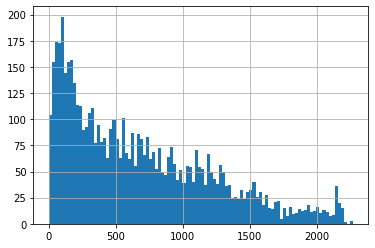

In [11]:
df_processed[COLUMN_NAME].hist(bins=100)

In [67]:
df_processed[COLUMN_NAME].value_counts()

562     31
91      21
165     19
689     15
92      15
        ..
1336     1
1901     1
1344     1
1352     1
1410     1
Name: days_active, Length: 1642, dtype: int64

In [105]:
#df_processed.to_csv('./data.csv')
#df_processed[df_processed['plan_PLAN-S-19Q1'] == 1 & df_processed['annual_revenue'] == 0].describe()
#df_processed.query('annual_revenue == 0.0')


In [106]:
#np.sort(df_processed[COLUMN_NAME])[1000:2000]

In [107]:
# Plot sorted unique and non unique values for COLUMN_NAME

#plt.figure(figsize=(20,15))

#plt.plot(np.unique(np.sort(df_processed[COLUMN_NAME])), label=COLUMN_NAME)
#plt.plot(np.sort(df_processed[COLUMN_NAME]), label=COLUMN_NAME)

#plt.legend(loc='lower right')
#plt.show()

In [108]:
import matplotlib.pyplot as plt

#plt.figure(figsize=(20,20))
#plt.scatter(df_processed['days_active_log'],df_processed[COLUMN_NAME], c='b', marker='.', label='median')

#plt.legend(loc='upper left')
#plt.show()

In [110]:
# The next step needs only positive values, this will show which rows are <= 0
df_processed[df_processed[COLUMN_NAME] <= 0]

# This is how to replace the <= 0 values with something, mean or median is usually a good idea
df_processed[COLUMN_NAME][df_processed[COLUMN_NAME] <= 0] = df_processed[COLUMN_NAME].median()

//anaconda2/envs/fastai-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [112]:
df_processed[COLUMN_NAME + '_log'].var(), df_processed[COLUMN_NAME + '_log'].skew(), df_processed[COLUMN_NAME + '_log'].mad(), df_processed[COLUMN_NAME + '_log'].mode()



(0.1833573217533611, -6.599977513350912, 0.08744376340845679, 0    5.986452
 dtype: float64)

In [113]:
from scipy import stats
boxcox, bc_params = stats.boxcox(df_processed[COLUMN_NAME])
bc_params

0.2927335330290034

In [114]:
df_processed[COLUMN_NAME + '_bc'] = boxcox

Text(0,0.5,'Occurrence')

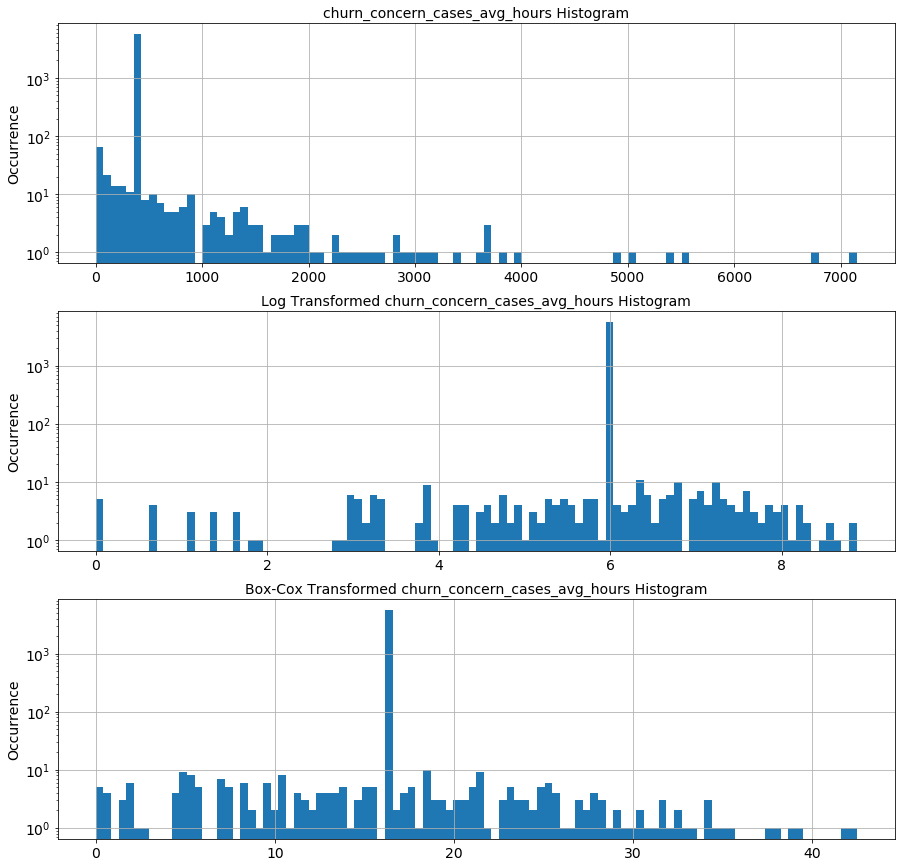

In [115]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(15,15))

# original review count histogram
df_processed[COLUMN_NAME].hist(ax=ax1, bins=100)
ax1.set_yscale('log')
ax1.tick_params(labelsize=14)
ax1.set_title(COLUMN_NAME + ' Histogram', fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Occurrence', fontsize=14)

# review count after log transform
df_processed[COLUMN_NAME + '_log'].hist(ax=ax2, bins=100)
ax2.set_yscale('log')
ax2.tick_params(labelsize=14)
ax2.set_title('Log Transformed ' + COLUMN_NAME + ' Histogram', fontsize=14)
ax2.set_xlabel('')
ax2.set_ylabel('Occurrence', fontsize=14)# review count after optimal Box-Cox transform

df_processed[COLUMN_NAME + '_bc'].hist(ax=ax3, bins=100)
ax3.set_yscale('log')
ax3.tick_params(labelsize=14)
ax3.set_title('Box-Cox Transformed ' + COLUMN_NAME + ' Histogram', fontsize=14)
ax3.set_xlabel('')
ax3.set_ylabel('Occurrence', fontsize=14)

In [121]:
print(f"Log transform skew: {df_processed[COLUMN_NAME + '_log'].skew()}")
print(f"Box-Cox transform skew: {df_processed[COLUMN_NAME + '_bc'].skew()}")

Log transform skew: -6.599977513350912
Box-Cox transform skew: 1.7393019055073713


In [122]:
df_processed[COLUMN_NAME + '_log'].describe()

count    5885.000000
mean        5.966895
std         0.428202
min         0.000000
25%         5.986452
50%         5.986452
75%         5.986452
max         8.874868
Name: churn_concern_cases_avg_hours_log, dtype: float64

In [123]:
df_processed[COLUMN_NAME + '_bc'].describe()

count    5889.000000
mean       16.302658
std         2.012782
min         0.000000
25%        16.290015
50%        16.290015
75%        16.290015
max        42.483867
Name: churn_concern_cases_avg_hours_bc, dtype: float64

In [127]:
general_stats(df_processed, f"{COLUMN_NAME}_log")

churn_concern_cases_avg_hours_log

Min: 0.0
Max: 8.874867635688053
Mean: 5.966894977879099
Trimmed Mean: 5.986452005284437
Median: 5.986452005284438
Std: 0.42820243081206477
CV: 0.07176302455456775


In [131]:
general_stats(df_processed, f"{COLUMN_NAME}_bc")

churn_concern_cases_avg_hours_bc

Min: 0.0
Max: 42.4838674597342
Mean: 16.30265752220549
Trimmed Mean: 16.290014936864818
Median: 16.290014936864818
Std: 2.0127821052430592
CV: 0.1234634354859932


In [134]:
data_distribution(df_processed, f"{COLUMN_NAME}_log")

0.02
0.02
0.08


In [135]:
data_distribution(df_processed, f"{COLUMN_NAME}_bc")

0.03
0.14
0.22
